Resolución del problema del viajero o TSP utilizando deap
https://deap.readthedocs.io/en/master/

En primer lugar, debemos intalar la librería:


In [2]:
!pip install deap

     |████████████████████████████████| 163kB 2.8MB/s 


**Importamos las liberías necesarias:**
1. random: números pseudoaleatorios
2. numpy: arrays
3. maplotlib.pyplot: visualizar los resultados
4. deap.base: incluye las clases base de deap. En concreto dos son importantes en nuestro ejemplo, base.Fitness y base.Toolbox.
5. deap.creator: permite crear clases nuevas.
6. deap.tools: herramientas para implementar los algoritmos genéticos: operadores genéticos (selección, cruce y mutación), hallofFame, estadística, registro de evolución, etc.
7. deap.alorihtms: incluye implementaciones completas de algoritmos genéticos, nosotros vamos a utilizar eaSimple. 

In [0]:
import random
import numpy
import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

**Diccionario que contiene los datos del problema:**
1. Toursize: número de ciudades.
2. OptTour: tour óptimo para este problema. Estamos haciendo trampa :) sabemos la solución, no es lo normal.
3. OptDistance: distancia recorrida por el agente para el tour óptimo.
4. DistanceMatrix: matriz de distancia.

In [0]:
tsp = {
"TourSize" : 17,
"OptTour" : [15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3, 0],
"OptDistance" : 2085,
"DistanceMatrix" :
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]
}


Guardamos en dos variables distintas la matriz de distancia y el número de ciudades. Accedemos a los valores mediante las claves del diccionario.

In [0]:
distance_map = tsp["DistanceMatrix"] 
IND_SIZE = tsp["TourSize"] 

Creamos la clase que define el fitness de los individuos **FitnessMin**. Este paso en la mayoría de los problemas será muy parecido. Siempre tendremos que heredar de base.Fitness. El atributo **weights** nos dice el número de objetivos de nuestro problema y el tipo (-1.0 para minimizar y 1.0 para maximizar). En este caso es un problema de **minimización** de **un objetivo**. **En deap el caso mono objetivo es un caso particula del multiobjetivo**.

In [0]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

Ahora creamos la "plantilla" del individuo, **el cromosoma**. El individuo **será una lista** (hereda los métodos de la lista), pero tiene el atributo **FitnessMin** creado en la línea anterior. Representar los individuos como lista nos servirá en una gran cantidad de casos (lista de variables del problema).


In [8]:
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


El objeto toolbox funciona como una "caja de herramientas" donde **debemos registrar operaciones que nos hacen falta en el algoritmo genético**. Cosas que debemos registrar:
1. Funciones para crear tanto individuos aleatorios como la población inicial.
2. Operadores genéticos (selección, cruce y mutación).
3. La función de evaluación.

In [0]:
toolbox = base.Toolbox()

Comenzamos registrando las funciones que nos permiten generar individuos aleatorios y la población incial. Empezamos por muestra aleatorias de individuos (cromosoma). **No es el individuo completo ya que no tiene el  atributo fitness**.

In [0]:
# Generación de un tour aleatorio
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE) # aquí debemos registar una función que generar una muestra de individuo

Podemos ver la muestra que se crea:

In [16]:
print(toolbox.indices())

[2, 14, 4, 9, 13, 16, 1, 8, 12, 7, 15, 11, 6, 5, 0, 3, 10]


Generamos indivuos aleatorios y población inicial

In [0]:
# Generación de inviduos y población
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
POP_SIZE=100
toolbox.register("population", tools.initRepeat, list, toolbox.individual, POP_SIZE) # 

Vamos a ver cómo funcionan con un par de ejemplos:

In [18]:
ind = toolbox. individual() # creamos un individuo aleatorio
print(ind)
print(ind.fitness.values) # en fitness.values se guardará el fitness

[14, 7, 3, 1, 6, 0, 13, 16, 9, 4, 11, 8, 10, 5, 2, 12, 15]
()


In [19]:
pop = toolbox.population() # creamos una población aleatoria
print(pop[:5]) # imprimimos los 5 primeros individuos

[[13, 1, 3, 5, 0, 15, 9, 2, 8, 7, 4, 11, 10, 16, 12, 14, 6], [8, 16, 14, 13, 0, 15, 6, 5, 2, 11, 12, 9, 10, 4, 7, 1, 3], [13, 0, 8, 3, 15, 5, 11, 14, 12, 10, 7, 1, 4, 6, 9, 16, 2], [0, 3, 1, 16, 4, 10, 6, 2, 12, 7, 9, 14, 13, 8, 11, 5, 15], [11, 13, 9, 15, 14, 10, 7, 8, 3, 5, 2, 0, 4, 1, 16, 12, 6]]


**Definimos la función objetivo:**
1.   En primer lugar calculamos la distancia entre la última ciudad y la primera 
2.   Recorremos dos listas la vez:
*   individual[0:-1], son los elementos del primero al penúltimo
*   individual[1:], son los elementos del segundo al último

Por lo tanto en cada interación, calculamos la distancia entre dos ciudades consecutivas.
**IMPORTANTE:** Siempre debemos devolver una tupla!! 





In [0]:
def evalTSP(individual):
    """ Función objetivo, calcula la distancia que recorre el viajante"""
    # distancia entre el último elemento y el primero
    distance = distance_map[individual[-1]][individual[0]]
    # distancia entre el resto de ciudades
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

**Registro de operadores genéticos:**


1.   Cruce ordenado.
2.   Mutación mediante mezcla de índices.
3.   Selección mediante torneo, tamaño del torneo igual a 3 (suele ir bien para la mayoría de problemas). Si tenemos muchas variables podemos probar a aumentarlo un poco.
4.   Función de evaluación.



In [0]:
toolbox.register("mate", tools.cxOrdered)                       
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) 
toolbox.register("select", tools.selTournament, tournsize=3)    
toolbox.register("evaluate", evalTSP)                           

Función que nos permite visualizar la evolución del algoritmo. Recibe como entrada el registro de evolución.


In [0]:
def plot_evolucion(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, 
                     where=fit_maxs >= fit_mins, 
                     facecolor="g", alpha=0.2)
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"])
    ax1.set_ylim([2000, 6000])
    plt.grid(True)
    plt.savefig("EvolucionTSP.eps", dpi=300)

En el main configuramos el algoritmo genético. 

Ajuste de los operadores genéticos:
* *CXPB:* probabilidad de cruce
* *MUTPB:* probabilidad de mutación

Número de generaciones:
* *NGEN:* número de generaciones

El objeto **hof** almacena el mejor individuo encontrado a lo largo de las generaciones. Le tenemos que p

El objeto **stats** calcula las estadísticas de la población en cada generación. Cuando se define le tenemos que decir sobre qué se va a calcular las estadística. A continuación, se deben registrar las funciones estadísticas que se van a aplicar.

El objeto **logbook** almacena todas las estadísticas calculadas por generación en un solo objeto.

Algoritmo **eaSimple** parámetros que tenemos que pasar:
* poblacion (obligatorio)
* toolbox (obligatorio)
* probabilidad de cruce (obligatorio)
* probabilidad de mutación (obligatorio)
* número de generaciones (obligatorio)
* objeto de estadísticas (opcional)
* objeto hallofFame que almacena el mejor individuo (opcional)
* Si queremos que se muestre las estádisticas en cada generación, verbose = True (opcional)











In [0]:
def main():
    random.seed(42) # ajuste de la semilla del generador de números aleatorios
    CXPB, MUTPB, NGEN = 0.7, 0.3, 120
    pop = toolbox.population() # creamos la población inicial 
    hof = tools.HallOfFame(1) 
    stats = tools.Statistics(lambda ind: ind.fitness.values) 
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    logbook = tools.Logbook()     
    pop, logbook = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN, stats=stats, halloffame=hof, verbose=True)
    return hof, logbook

Lanzamos el algoritmo y mostramos los resultados.

gen	nevals	avg    	std    	min 	max 
0  	100   	4728.62	387.423	3511	5461
1  	79    	4398.68	373.879	3511	5234
2  	77    	4204.02	383.752	3220	5306
3  	76    	4036.49	382.07 	3220	5149
4  	90    	3908.84	360.576	3220	5029
5  	85    	3724.67	328.176	2969	4747
6  	88    	3644.59	404.069	2873	4752
7  	81    	3561.5 	388.837	2933	4777
8  	75    	3410.91	371.815	2716	4942
9  	76    	3365.71	428.956	2716	4992
10 	66    	3263.69	418.174	2612	4568
11 	78    	3172.67	409.922	2546	4550
12 	82    	3183.26	419.272	2546	5142
13 	75    	3079.08	402.168	2546	4476
14 	84    	3006.46	392.294	2529	4596
15 	74    	2897.6 	412.943	2498	5163
16 	78    	2810.34	371.635	2459	4231
17 	81    	2767.01	337.917	2333	4019
18 	86    	2780.97	451.152	2333	4890
19 	85    	2741.42	340.322	2333	4015
20 	80    	2766.6 	450.935	2255	4615
21 	84    	2839.02	505.364	2255	5019
22 	75    	2757.56	377.2  	2255	4344
23 	75    	2722.48	406.934	2255	4264
24 	80    	2705.27	447.942	2255	4828
25 	80    	2579.32	332.565	2255	3506
2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  del sys.path[0]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


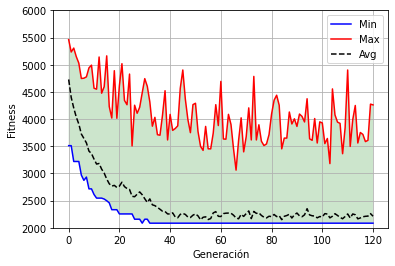

In [26]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log) # mostamos la evolución